# Preliminary Step : Check your IP and whether you have access to websites

In [ ]:
import requests 

### get you IP address
x = requests.get('https://ipinfo.io/ip')
print(x.text)  

## this should give 401, unauthorized if whitelisted 
x = requests.get('https://api.tradefeedr.com')
print(x.status_code)  


## this should return 200 - this is not 3rd part auth provider
## IP should be allowed in your organization, check 
x = requests.get("https://tradefeedr.eu.auth0.com")
print(x.status_code)  

# Step 1 : Create Link, click on link and login with you credentials 

### You should see "All Set"  message in your browser before moving forward

In [ ]:
from tf_api_device import TfApiDevice
tf = TfApiDevice()
tf.request_login()

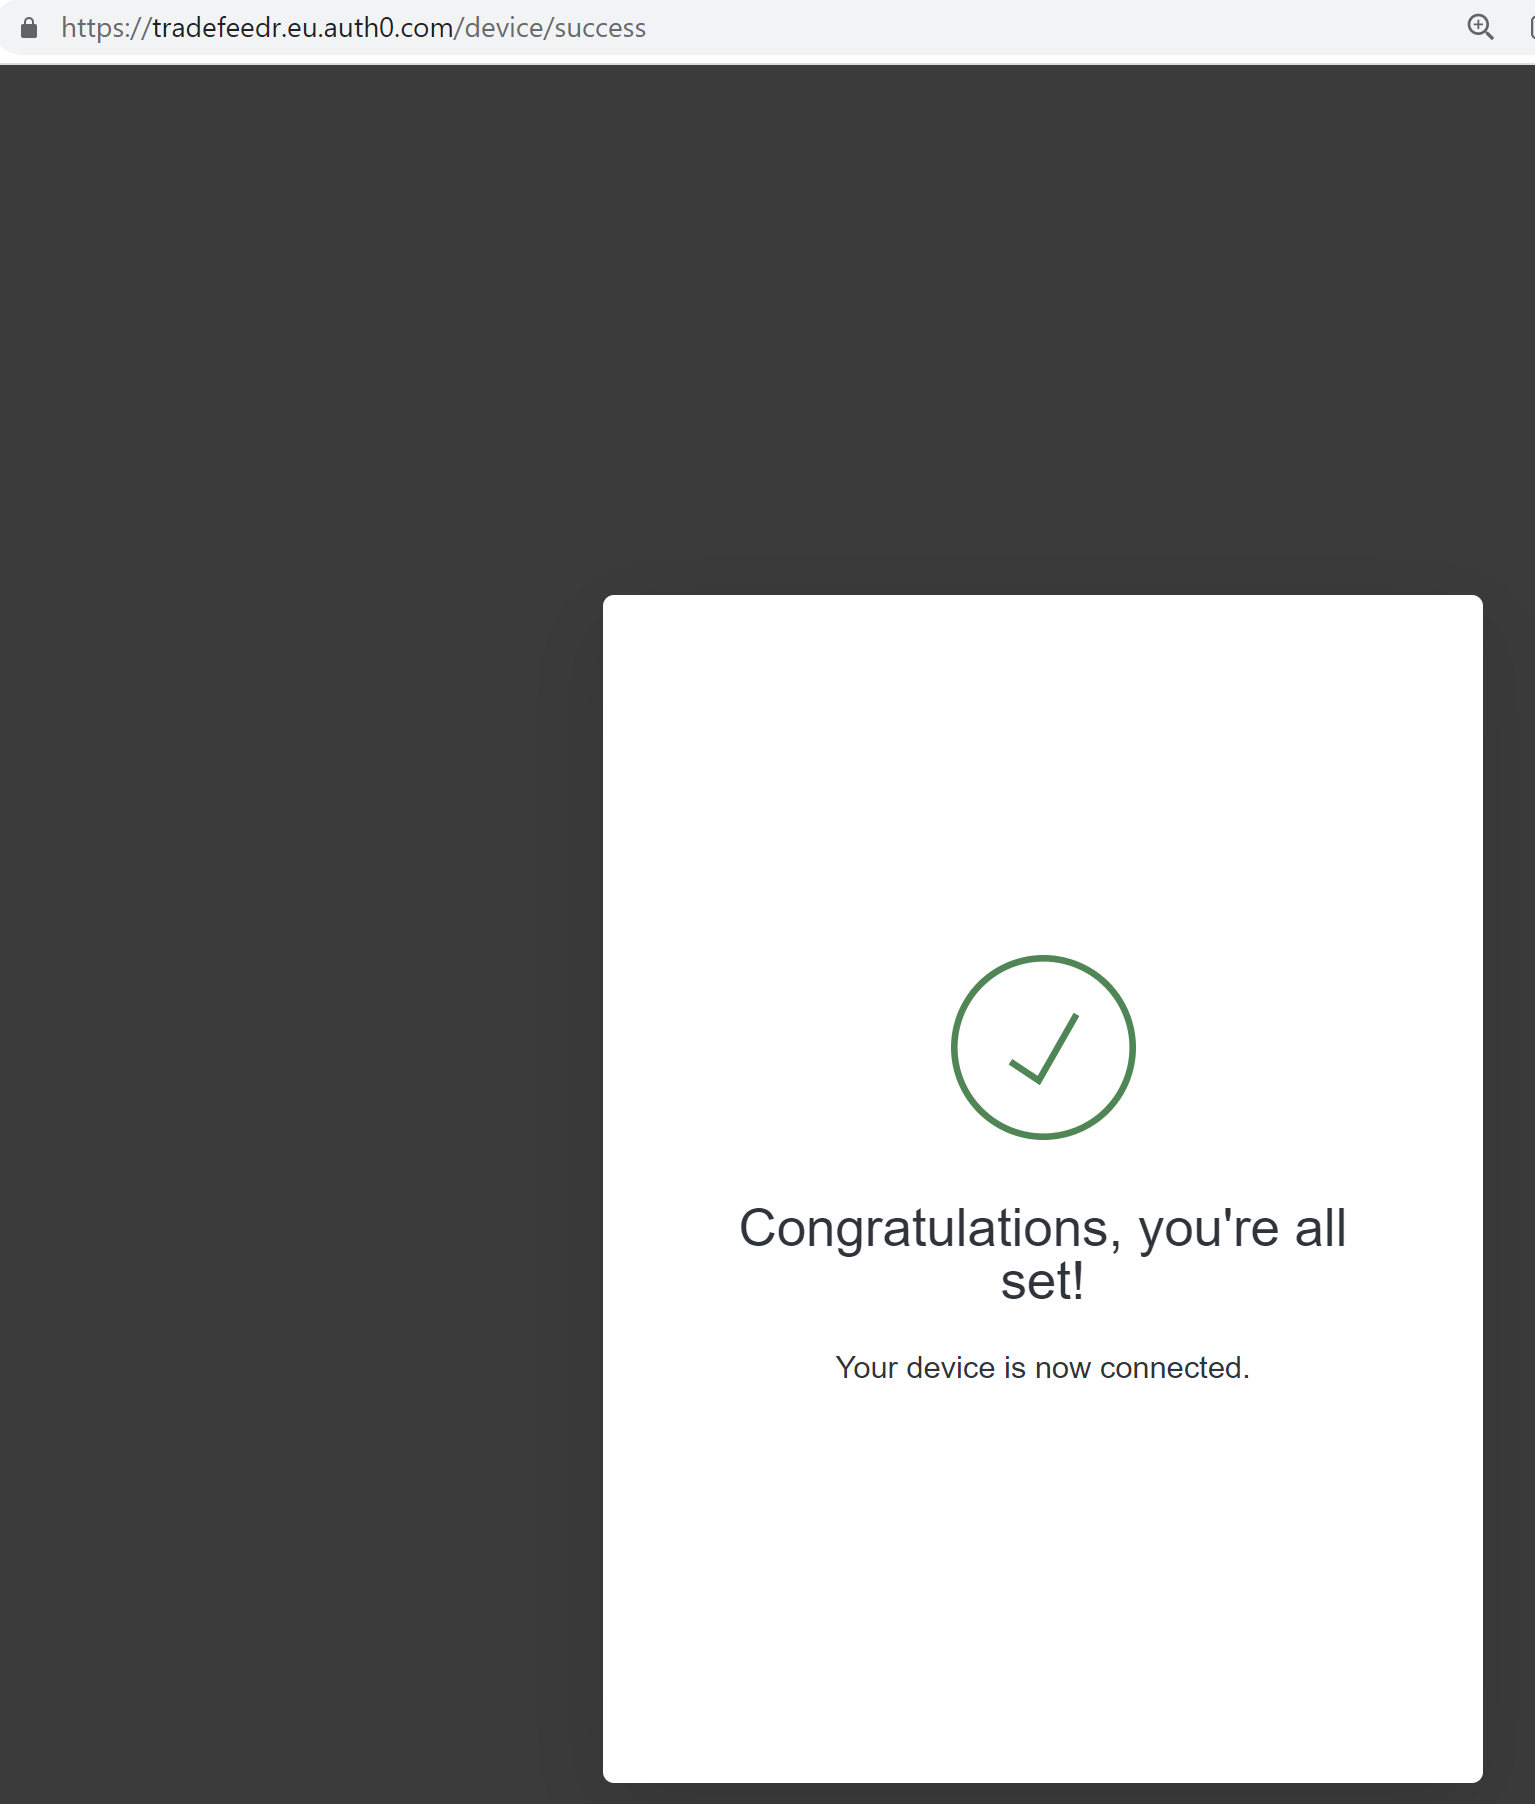

# Step 2. Get Token - Only run is ONCE 


In [ ]:
token = tf.request_token()
token['access_token'][:10]

# Step 3 = Tests API REST 

In [ ]:
tf.query_api(endpoint = 'test_success', options = {})

# Risk Transfer Example -  Specific Example 

In [ ]:
options = {
      "filter":[
            {"var":"Symbol", "par":['USDZAR', 'EURGBP', 'EURUSD']},
            {"var":"ArrivalTime", "par": ['2022.01.20D11:38:48.725717000', '2022.01.19D07:52:08.725717000', '2022.01.18D04:05:28.725717000']},
            {"var":"OrderQuantity", "par": [100, 200, 300]},
          
      ]
   }


#tf = TradefeedrApi(demo=False)
import pandas as pd

endpoint = "v1/fx/stats/risk-transfer-cost"
response  = tf.query_api(endpoint , options)
data = pd.DataFrame(response['result'])   
data

# Algo API 



## `v1/fx/algo/parent-order-stats`

In [ ]:
tf_api_object  = tf

## options
options = {
    "groupby": [
        "LP"
     ],
      "filter": [
          {"function": "within", "var": "Date", "pars": ["2014-01-01", "2025-12-31"]},
          #{"function": "eq", "var": "Symbol", "par": "EURUSD"},
          #{"function": "within", "var": "ArrivalTime", "transform": "time", "pars": ["09:00:00", "20:00:00"]},
    ],
    "risk_price_benchmark": "TradefeedrModel",
    "notation": "performance",
}

endpoint  = "v1/fx/algo/parent-order-stats"
response = tf_api_object.query_api(endpoint, options)
data_frame = pd.DataFrame(response['result'])
data_frame